Nozzle length: 0.4111 m
Expansion ratio: 9.00
Number of points: 199


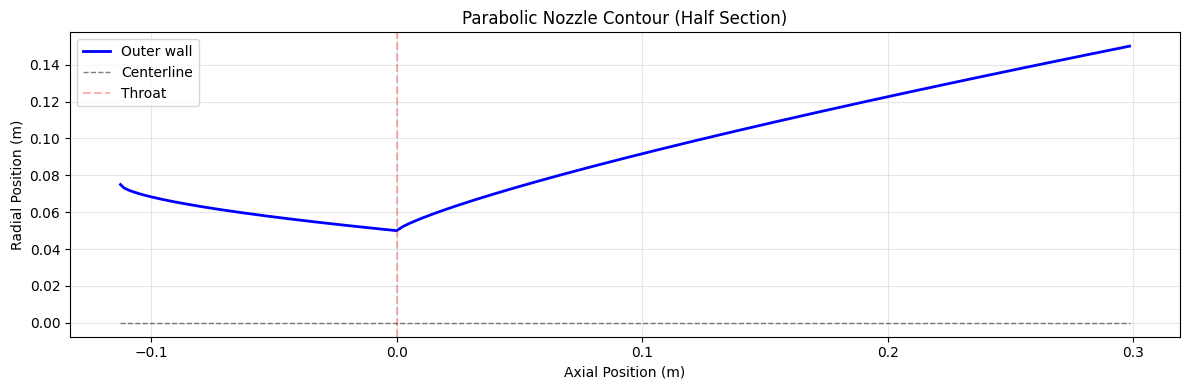

In [1]:
from base.nozzle.parabolic_nozzle import ParabolicNozzle, ParabolicNozzleParams

params = ParabolicNozzleParams(
    throat_radius=0.05,      # 50 mm
    exit_radius=0.15,        # 150 mm
    chamber_radius=0.075,    # 75 mm
    convergent_power=0.6,    # Smooth convergence
    divergent_power=0.8      # Smooth divergence
)

# Create nozzle
nozzle = ParabolicNozzle(params)

# Generate contour
x, r = nozzle.generate_contour(n_points=200)

# Print some info
print(f"Nozzle length: {x[-1] - x[0]:.4f} m")
print(
    f"Expansion ratio: {(params.exit_radius/params.throat_radius)**2:.2f}")
print(f"Number of points: {len(x)}")

# Visualize
nozzle.plot(n_points=200)

In [3]:
from base.config_loader.simulation_config import load_config
from base.templates.openfoam.control_dict import generate_control_dict

# Method 1: Validate and display config
loader = load_config("../config/simulation_config.yaml")
loader.validate_config()
loader.print_config()

# Method 2: Get parameters
params = loader.get_control_dict_params()

# Method 3: Generate and save controlDict
control_dict = generate_control_dict(params)
print(control_dict)


✓ Config loaded from: ..\config\simulation_config.yaml
✓ Configuration is valid

CONFIGURATION SUMMARY

[PROJECT]
  description: Baseline supersonic rocket nozzle simulation configuration

[OPENFOAM]
  application: rhoCentralFoam
  start_time: 0
  end_time: 1.0
  delta_t: 1e-05
  write_interval: 100
  write_format: ascii
  write_precision: 8
  write_compression: off
  time_format: general
  time_precision: 6
  purge_write: 2


✓ ControlDictParams created successfully
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    location    "system";
    object      controlDict;
}

// ========== APPLICATION ==========
application         rhoCentralFoam;

// ========== TIME CONTROL ==========
startTime           0.0;
endTime             1.0;
deltaT              1e-05;

writeControl        timeStep;
writeInterval       100;

// ========== OUTPUT FORMAT ==========
writeFormat         ascii;
writePrecision      8;
writeCompression    off;

timeFormat          genera

✓ Nozzle config loaded from: ..\config\nozzle_params.yaml
✓ Nozzle configuration is valid

NOZZLE CONFIGURATION SUMMARY

[NOZZLE TYPE]: parabolic

[DIMENSIONS]
  Throat radius:   0.05 m
  Exit radius:     0.15 m
  Chamber radius:  0.075 m
  Expansion ratio: 9.00

[PARABOLIC PARAMETERS]
  Convergent power: 0.6
  Divergent power:  0.8

[MESH PARAMETERS]
  Axial points:   200
  Radial points:  50


✓ ParabolicNozzleParams created successfully
✓ ParabolicNozzle created successfully


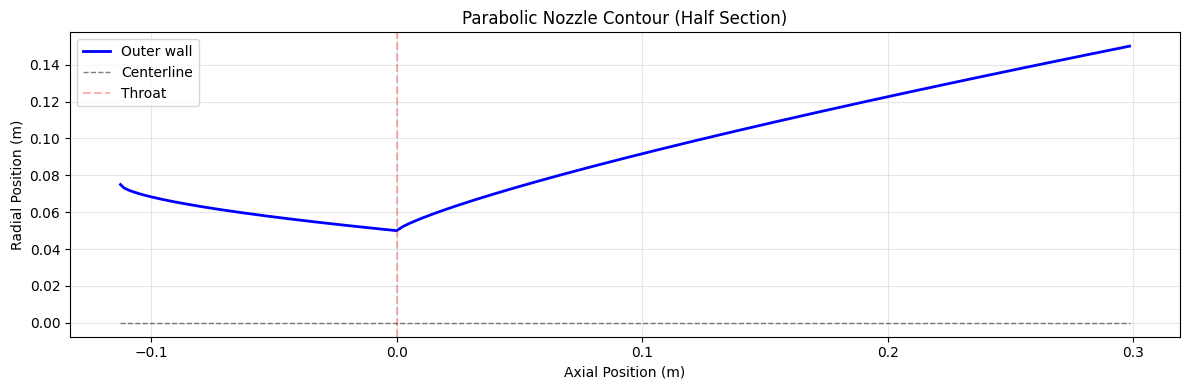

✓ Nozzle config loaded from: ..\config\nozzle_params.yaml
✓ ParabolicNozzleParams created successfully
✓ ParabolicNozzle created successfully


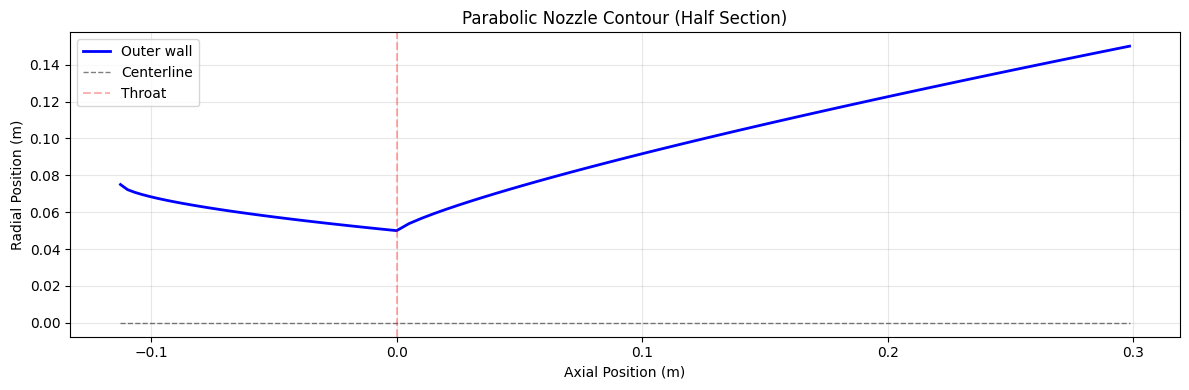

In [1]:
from base.config_loader.nozzle_config import load_nozzle_config, create_nozzle_from_config

# Method 1: Load and validate
loader = load_nozzle_config("../config/nozzle_params.yaml")
loader.validate_config()
loader.print_config()

# Method 2: Create nozzle from config
nozzle = loader.create_nozzle()

# Get mesh parameters from config
mesh_params = loader.get_mesh_params()

# Generate contour
x, r = nozzle.generate_contour(n_points=mesh_params['axial_points'])

# Visualize
nozzle.plot(n_points=mesh_params['axial_points'])

# Method 3: Quick one-liner
nozzle = create_nozzle_from_config("../config/nozzle_params.yaml")
nozzle.plot()

In [1]:
from base.config_loader.simulation_config import load_config
from base.templates.openfoam.fv_schemes import generate_fv_schemes

# Load config
loader = load_config("../config/simulation_config.yaml")
loader.validate_config()
loader.print_config()

# Get fvSchemes parameters
fv_schemes_params = loader.get_fv_schemes_params()

# Generate fvSchemes file
fv_schemes = generate_fv_schemes(fv_schemes_params)
print(fv_schemes)


✓ Config loaded from: ..\config\simulation_config.yaml
✓ Configuration is valid

SIMULATION CONFIGURATION SUMMARY

[PROJECT]
  description: Baseline supersonic rocket nozzle simulation configuration

[CONTROLS]
  application: rhoCentralFoam
  start_time: 0
  end_time: 1.0
  delta_t: 1e-05
  write_interval: 100
  write_format: ascii
  write_precision: 8
  write_compression: off
  time_format: general
  time_precision: 6
  purge_write: 2

[NUMERICAL SCHEMES]

  Time Discretization:
    Euler

  Gradient Schemes:
    default_grad: Gauss linear
    grad_U: Gauss linear
    grad_p: Gauss linear
    default_sn_grad: corrected

  Divergence Schemes:
    default_div: none
    div_phi_U: Gauss linearUpwind grad(U)
    div_phi_k: Gauss limitedLinear 1
    div_phi_epsilon: Gauss limitedLinear 1
    div_phi_omega: Gauss limitedLinear 1
    div_rho_phi_U: Gauss linearUpwind grad(U)
    div_rho_phi_K: Gauss linear
    div_phi_K: Gauss linear

  Laplacian Schemes:
    default_laplacian: Gauss linear 

In [2]:
from base.config_loader.simulation_config import load_config
from base.templates.openfoam.fv_solution import generate_fv_solution

loader = load_config("../config/simulation_config.yaml")
loader.validate_config()
loader.print_config()

fv_solution_params = loader.get_fv_solution_params()
fv_solution = generate_fv_solution(fv_solution_params)
print(fv_solution)


✓ Config loaded from: ..\config\simulation_config.yaml
✓ Configuration is valid

SIMULATION CONFIGURATION SUMMARY

[PROJECT]
  description: Baseline supersonic rocket nozzle simulation configuration

[CONTROLS]
  application: rhoCentralFoam
  start_time: 0
  end_time: 1.0
  delta_t: 1e-05
  write_interval: 100
  write_format: ascii
  write_precision: 8
  write_compression: off
  time_format: general
  time_precision: 6
  purge_write: 2

[NUMERICAL SCHEMES]

  Time Discretization:
    Euler

  Gradient Schemes:
    default_grad: Gauss linear
    grad_U: Gauss linear
    grad_p: Gauss linear
    default_sn_grad: corrected

  Divergence Schemes:
    default_div: none
    div_phi_U: Gauss linearUpwind grad(U)
    div_phi_k: Gauss limitedLinear 1
    div_phi_epsilon: Gauss limitedLinear 1
    div_phi_omega: Gauss limitedLinear 1
    div_rho_phi_U: Gauss linearUpwind grad(U)
    div_rho_phi_K: Gauss linear
    div_phi_K: Gauss linear

  Laplacian Schemes:
    default_laplacian: Gauss linear 

In [2]:
from base.config_loader.nozzle_config import load_nozzle_config
from base.config_loader.simulation_config import load_config
from base.templates.openfoam.block_mesh import generate_block_mesh_dict

# Nozzle geometry
nloader = load_nozzle_config("../config/nozzle_params.yaml")
nozzle = nloader.create_nozzle()

# Block-mesh params
sloader = load_config("../config/simulation_config.yaml")
bm_params = sloader.get_block_mesh_params()
sloader.print_config()
sloader.validate_config()

# Generate blockMeshDict
bmd = generate_block_mesh_dict(nozzle, bm_params)


✓ Nozzle config loaded from: ..\config\nozzle_params.yaml
✓ ParabolicNozzleParams created successfully
✓ ParabolicNozzle created successfully
✓ Config loaded from: ..\config\simulation_config.yaml

SIMULATION CONFIGURATION SUMMARY

[PROJECT]
  description: Baseline supersonic rocket nozzle simulation configuration

[CONTROLS]
  application: rhoCentralFoam
  start_time: 0
  end_time: 1.0
  delta_t: 1e-05
  write_interval: 100
  write_format: ascii
  write_precision: 8
  write_compression: off
  time_format: general
  time_precision: 6
  purge_write: 2

[NUMERICAL SCHEMES]

  Time Discretization:
    Euler

  Gradient Schemes:
    default_grad: Gauss linear
    grad_U: Gauss linear
    grad_p: Gauss linear
    default_sn_grad: corrected

  Divergence Schemes:
    default_div: none
    div_phi_U: Gauss linearUpwind grad(U)
    div_phi_k: Gauss limitedLinear 1
    div_phi_epsilon: Gauss limitedLinear 1
    div_phi_omega: Gauss limitedLinear 1
    div_rho_phi_U: Gauss linearUpwind grad(U)
 

In [2]:
from base.preparation.case_structure import CaseBuilder
CaseBuilder(sim_cfg_path="../config/simulation_config.yaml", noz_cfg_path="../config/nozzle_params.yaml").build("../case/baseline")

✓ Config loaded from: ..\config\simulation_config.yaml
✓ Nozzle config loaded from: ..\config\nozzle_params.yaml
✓ ControlDictParams created successfully
✓ FvSchemesParams created successfully
✓ ParabolicNozzleParams created successfully
✓ ParabolicNozzle created successfully
✓ Case written to: ..\case\baseline
